# Decision Trees

In [20]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [3]:
#import imputed dataset
mice_rf = pd.read_csv("data/imputed_dataset_no_censoring_01042018_MICERF")
mice_std = pd.read_csv("data/imputed_dataset_no_censoring_01042018_MICERF_standardized")

In [4]:
#target variable should not be standardized
#replace life expectancy column in mice_std with a non standardized life expectancy variable
df = mice_std.copy()
df.drop("life_expectancy", axis=1, inplace=True)
df['life_expectancy'] = mice_rf["life_expectancy"]

In [5]:
df

,Gender,Tumor_type,Tumor_grade,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,...,Tumor_Location,Tumor_Position,Surgery_type,Age_surgery,IDH,TERT,IDH_TERT,X1p19q_codel,IK,life_expectancy
0,M,gliome,three,NC,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,G,partielle,0.414634,mutant,wt,three,zero,0.750,30
1,M,astrocytome,two,NC,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,N,non précisé,exérèse,0.243902,NC,mutant,four,zero,0.875,2069
2,F,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,A,G,aucune,0.621951,wt,mutant,four,zero,0.625,393
3,M,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,D,partielle,0.646341,wt,wt,three,zero,0.500,398
4,F,GBM,four,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,NORMAL,Maintien,...,A,D,exérèse,0.609756,wt,mutant,four,zero,0.625,433
5,M,GBM,four,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,...,A,G,exérèse,0.585366,wt,mutant,four,zero,0.750,143
6,M,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,N,G,exérèse,0.743902,wt,wt,three,zero,0.750,408
7,M,GBM,four,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,N,non précisé,exérèse,0.707317,wt,mutant,four,zero,0.500,7
8,F,astrocytome,three,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,G,partielle,0.646341,wt,mutant,four,zero,0.750,316
9,M,GBM,four,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,...,A,G,partielle,0.426829,wt,mutant,four,zero,0.750,571


In [5]:
#specify categorical variables coded as numbers as such, to avoid pandas reading them as continuous ones
df.columns

Index(['Gender', 'Tumor_type', 'Tumor_grade', 'Gene_P53', 'Gene_Mgmt',
       'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx',
       'Gene_Ch10Q', 'Gene_Ch9P', 'Tumor_Location', 'Tumor_Position',
       'Surgery_type', 'Age_surgery', 'IDH', 'TERT', 'IDH_TERT',
       'X1p19q_codel', 'IK', 'life_expectancy'],
      dtype='object')

In [6]:
#create dataset with dummy variables
#specify all categorical variables as otherwise .get_dummies() will still ignore IDH_TERT/Tumor_grade etc.
df_dum = pd.get_dummies(df)

In [7]:
#check
df_dum.columns

Index(['Age_surgery', 'IK', 'life_expectancy', 'Gender_F', 'Gender_M',
       'Tumor_type_GBM', 'Tumor_type_astrocytome',
       'Tumor_type_astrocytome gémistocytique (=A2)',
       'Tumor_type_astrocytome pilocytique', 'Tumor_type_gangliogliome',
       'Tumor_type_gliome', 'Tumor_type_oligo', 'Tumor_grade_four',
       'Tumor_grade_one', 'Tumor_grade_three', 'Tumor_grade_two',
       'Gene_P53_ALTERE', 'Gene_P53_NC', 'Gene_P53_NORMAL',
       'Gene_Mgmt_METHYLE', 'Gene_Mgmt_NON METHYLE', 'Gene_Egfr_AMPLIFIE',
       'Gene_Egfr_NORMAL', 'Gene_Mdm2_AMPLIFIE', 'Gene_Mdm2_NORMAL',
       'Gene_Cdk4_AMPLIFIE', 'Gene_Cdk4_NORMAL', 'Gene_P16_DELETE',
       'Gene_P16_NORMAL', 'Gene_Ihc_Atrx_Extinction diffuse',
       'Gene_Ihc_Atrx_Maintien', 'Gene_Ihc_Atrx_extinction',
       'Gene_Ch10Q_NON PERTE', 'Gene_Ch10Q_PERTE', 'Gene_Ch9P_GAIN',
       'Gene_Ch9P_NON PERTE', 'Gene_Ch9P_PERTE', 'Tumor_Location_A',
       'Tumor_Location_B', 'Tumor_Location_C', 'Tumor_Location_N',
       'Tumor_Loc

In [8]:
#separate target column from the predictors
predictors = df_dum.drop("life_expectancy", axis = 1)
target = df_dum['life_expectancy']

In [9]:
#now separate the test set from the training one
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.15, random_state = 37)

In [10]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1773, 60), (313, 60), (1773,), (313,))

In [13]:
#now separate the training set into training and validation
#training_set = pd.concat([X_train, Y_train], axis = 1)

In [14]:
#training_set.shape

(1773, 61)

In [15]:
#r, c = training_set.shape

In [19]:
#i_cols = []
#for i in range(0, c-1):
#    i_cols.append(i)

In [20]:
#separate target column and rest
#X = training_set.iloc[:,0:(c-1)]
#Y = training_set.iloc[:,(c-1)]

In [21]:
#X.shape, Y.shape

((1773, 60), (1773,))

In [22]:
#validation set size
#val_size = 0.1

In [13]:
#use a common seed
seed = 0

In [24]:
#Split the data
#X_train_2, X_val, Y_train2, Y_val = cross_validation.train_test_split(X, Y, 
 #                                                                    test_size = val_size, 
  #                                                                    random_state = seed)

In [15]:
#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms
mae = []

# Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression(n_jobs = -1)
algo = "LR"

In [30]:
for name, i_cols_list in X_all:
    model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
    result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
    mae.append(result)
    print(name + " %s" % result)
comb.append(algo)

All 605.629206462


In [20]:
model.fit(X_train, Y_train)

653.0607028753993


In [42]:
pred = model.predict(X_test)

In [43]:
result = mean_absolute_error(Y_test, pred)
print(result)

653.0607028753993


In [40]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-1.26219500e+03  9.72655988e+02 -2.95832370e+15 -2.95832370e+15
  2.47673837e+15 -1.27003447e+15 -1.27003447e+15 -3.86499346e+14
 -3.86499346e+14 -1.27003447e+15 -1.27003447e+15  3.27232389e+15
  6.13556161e+15  7.01909673e+15  7.01909673e+15 -1.85525290e+15
 -1.85525290e+15 -1.85525290e+15  9.03571666e+15  9.03571666e+15
 -1.81595244e+14 -1.81595244e+14 -2.04981062e+15 -2.04981062e+15
  1.05931626e+15  1.05931626e+15 -3.64378724e+14 -3.64378724e+14
 -6.33100513e+14 -6.33100513e+14 -6.33100513e+14  2.30984415e+15
  2.30984415e+15 -1.97867614e+15 -1.97867614e+15 -1.97867614e+15
 -9.32569854e+14 -9.32569854e+14 -9.32569854e+14 -9.32569854e+14
 -9.32569854e+14 -6.82757471e+14 -6.82757471e+14 -6.82757471e+14
 -6.82757471e+14 -6.82757471e+14 -7.09443627e+14 -7.09443627e+14
 -7.09443627e+14 -7.09443627e+14 -1.75999990e+15 -1.75999990e+15
 -1.75999990e+15 -1.03709125e+15 -1.03709125e+15  1.08501421e+15
  1.08501421e+15  1.08501421e+15  2.35988488e+14  2.35988488e+14]


In [47]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, pred))

Mean squared error: 1052415.61


In [48]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, pred))

Variance score: 0.39


In [36]:
mae, comb

([605.62920646158989], ['LR'])

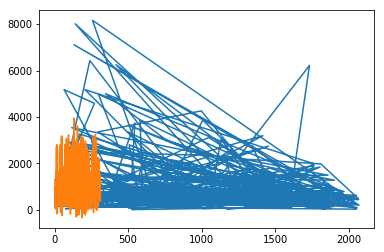

In [96]:
plt.plot(Y_test)
plt.plot(pred)

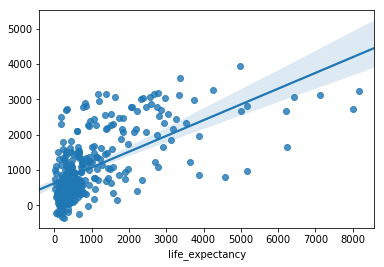

In [79]:
sns.regplot(Y_test, pred)

# Ridge LinearRegression 

In [97]:
from sklearn.linear_model import Ridge

In [105]:
#alpha values
a_list = np.array([1, 10, 100, 150, 500])

In [106]:
for alpha in a_list:
    #set base model
    model = Ridge(alpha = alpha, random_state = seed)
    
    algo = "Ridge"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
    
    comb.append(algo + " %s" % alpha)

651.4101673932902
642.9894463715951
640.3968493361714
645.9232933808719
685.0461052962222


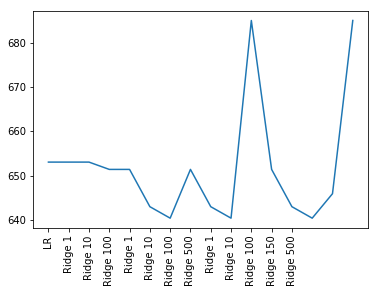

In [107]:
#Plot mae and all combinations
fix, ax = plt.subplots()
plt.plot(mae)

#Set tick names to names of all combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")
plt.show()

# Lasso Linear Regression

In [108]:
from sklearn.linear_model import Lasso

In [109]:
#alpha value
a_list = np.array([1, 10, 100, 150, 500, 1000])

In [114]:
for alpha in a_list:
    
    #set base model
    
    model = Lasso(alpha = alpha, random_state = seed)
    
    algo = "Lasso"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
    comb.append(algo + " %s" % alpha)

647.3232619294944
626.9899792668846
696.7657918943412
740.9354492766992
901.3527477299716
901.3527477299716


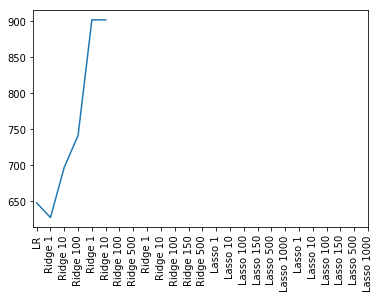

In [115]:
#Plot the MAE and all combinations
fig, ax = plt.subplots()
plt.plot(mae)

#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")

#plot
plt.show()

# Elastic net regression

In [116]:
from sklearn.linear_model import ElasticNet

In [117]:
a_list = np.array([0.1, 1, 10, 100, 1000])

In [119]:
for alpha in a_list:
    
    model = ElasticNet(alpha = alpha, random_state=seed)
    
    algo = "Elastic"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
    
    comb.append(algo + " %s" % alpha)

639.3653199346301
714.2186569839846
847.448169808833
896.5548860530158
901.3527477299716


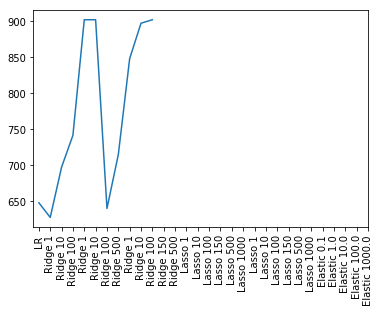

In [120]:
fix, ax = plt.subplots()

plt.plot(mae)

ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")

plt.show()

# KNN

In [121]:
from sklearn.neighbors import KNeighborsRegressor

In [126]:
n_list = np.array([1, 5, 10, 20, 30, 50, 100])

In [127]:
for neighbors in n_list:
    
    model = KNeighborsRegressor(n_neighbors = neighbors, n_jobs = -1)
    
    algo = "KNN"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
    comb.append(algo + " %s" % result)

859.4185303514377
654.9955271565495
641.7718849840256
640.1071884984025
634.4271565495208
622.4959744408947
633.0117571884983


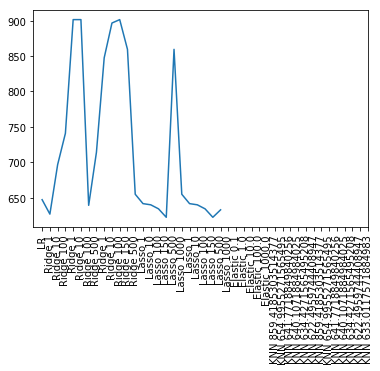

In [128]:
##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    

# CART

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
model = DecisionTreeRegressor(random_state = seed)
    
algo = "CART"
    
model.fit(X_train, Y_train)
result = mean_absolute_error(Y_test, model.predict(X_test))
        
mae.append(result)

print(result)

833.0287539936103


In [133]:
#Add max depth value
d_list = np.array([20])

In [135]:
for max_depth in d_list:
    
    model = DecisionTreeRegressor(max_depth = max_depth, random_state = seed)
    
    algo = "CART"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
        
    mae.append(result)
        
    print(result)
    
    comb.append(algo + " %s" % max_depth)

859.8633686442288


# SVM

In [136]:
from sklearn.svm import SVR

In [137]:
#C value
c_list = np.array([5])

In [138]:
for C in c_list:
    
    model = SVR(C=C)
    
    algo = "SVM"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
    comb.append(algo + " %s" % result)

715.2005759910877


In [61]:
mae

[605.62920646158989,
 603.57772215138812,
 596.24583661938436,
 592.06653315113101,
 599.3666196732479,
 598.48330281896267,
 676.79355130527881,
 758.22124214676955,
 590.86093254985008,
 642.30003866000663,
 735.08897946274033,
 754.61267426089364,
 795.33715625953494,
 836.87078651685397,
 659.86123595505626,
 670.05674157303372,
 679.5433707865169,
 861.63202247191009,
 682.20761453534863]

# Bagged Decision Trees

In [62]:
#before starting trees, we reinitialize datasets since we don't need dummies for these methods
df_trees = df.copy()

In [63]:
df_trees

,Gender,Tumor_type,Tumor_grade,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,...,Tumor_Location,Tumor_Position,Surgery_type,Age_surgery,IDH,TERT,IDH_TERT,X1p19q_codel,IK,life_expectancy
0,M,gliome,three,NC,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,G,partielle,0.414634,mutant,wt,three,zero,0.750,30
1,M,astrocytome,two,NC,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,N,non précisé,exérèse,0.243902,NC,mutant,four,zero,0.875,2069
2,F,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,A,G,aucune,0.621951,wt,mutant,four,zero,0.625,393
3,M,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,D,partielle,0.646341,wt,wt,three,zero,0.500,398
4,F,GBM,four,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,NORMAL,Maintien,...,A,D,exérèse,0.609756,wt,mutant,four,zero,0.625,433
5,M,GBM,four,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,...,A,G,exérèse,0.585366,wt,mutant,four,zero,0.750,143
6,M,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,N,G,exérèse,0.743902,wt,wt,three,zero,0.750,408
7,M,GBM,four,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,N,non précisé,exérèse,0.707317,wt,mutant,four,zero,0.500,7
8,F,astrocytome,three,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,G,partielle,0.646341,wt,mutant,four,zero,0.750,316
9,M,GBM,four,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,...,A,G,partielle,0.426829,wt,mutant,four,zero,0.750,571


In [65]:
#separate target column from the predictors
predictors = df_dum.drop("life_expectancy", axis = 1)
target = df_dum['life_expectancy']

In [66]:
#now separate the test set from the training one
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.15, random_state = 37)

In [68]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1773, 60), (313, 60), (1773,), (313,))

In [69]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [70]:
#n_estimators
n_list = np.array([10])

In [71]:
for n_estimators in n_list:
    
    model = BaggingRegressor(n_jobs = -1, n_estimators = n_estimators, random_state = seed)
    
    algo = "Bag"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

666.4083865814697


# Random forest (Bagging)

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
#n_estimators

n_list = np.array([])

In [74]:
for n_estimators in n_list:
    
    model = RandomForestRegressor(n_jobs = -1, n_estimators = n_estimators, 
                                 random_state = seed)
    
    algo = "RF"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

# Extra Trees

In [75]:
from sklearn.ensemble import ExtraTreesRegressor

In [76]:
n_list = np.array([50])

In [77]:
for n_estimators in n_list:
    
    model = ExtraTreesRegressor(n_jobs = -1, n_estimators = n_estimators, random_state = seed
                               )
    algo = "ET"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

672.547731629393


# Ada Boosting

In [78]:
from sklearn.ensemble import AdaBoostRegressor

In [79]:
#n_estimators
n_list = np.array([30])

In [80]:
for n_estimators in n_list:
    
    model = AdaBoostRegressor(n_estimators = n_estimators, random_state = seed)

    algo = "Ada"

    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

809.4883565385359


# Stochastic Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
n_list = np.array([10])

In [83]:
for n_estimators in n_list:
    
    model = GradientBoostingRegressor(n_estimators = n_estimators, random_state = seed)
    
    algo = "SGB"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

682.3644966300255


# XGBoost

In [84]:
from xgboost import XGBRegressor

In [85]:
n_list = np.array([10])

for n_estimators in n_list:
    
    model = XGBRegressor(n_estimators = n_estimators, random_seed = seed)
    
    algo = "XGB"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

588.4155243212423


In [86]:
dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test, label = Y_test)

In [87]:
#Learn mean from training data
mean_train = np.mean(Y_train)

#Get predictions on the test set
baseline_predictions = np.ones(Y_test.shape) * mean_train

#Compute MAE
mae_baseline = mean_absolute_error(Y_test, baseline_predictions)

print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 901.35


In [88]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [89]:
params['eval_metric'] = "mae"

In [90]:
num_boost_round = 999

In [91]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:765.015
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:641.502
[2]	Test-mae:586.894
[3]	Test-mae:582.071
[4]	Test-mae:595.828
[5]	Test-mae:603.859
[6]	Test-mae:622.422
[7]	Test-mae:619.691
[8]	Test-mae:623.28
[9]	Test-mae:624.612
[10]	Test-mae:623.13
[11]	Test-mae:624.306
[12]	Test-mae:626.016
[13]	Test-mae:635.672
Stopping. Best iteration:
[3]	Test-mae:582.071



In [92]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 582.07 with 4 rounds


In [93]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

cv_results

,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
0,801.603736,29.482058,788.657813,8.436461
1,670.426587,26.690913,635.241516,7.826116
2,621.074902,34.551005,555.019812,4.713459
3,601.036072,36.854407,510.506848,6.940614
4,597.530420,33.584463,483.034888,8.755148


In [94]:
cv_results['test-mae-mean'].min()

597.5304199999999

In [95]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(5,12)
    for min_child_weight in range(3,11)
]

In [96]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )

    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=5, min_child_weight=3


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


	MAE 594.0017942000001 for 4 rounds
CV with max_depth=5, min_child_weight=4
	MAE 597.2217164000001 for 5 rounds
CV with max_depth=5, min_child_weight=5
	MAE 590.8568235999999 for 5 rounds
CV with max_depth=5, min_child_weight=6
	MAE 590.0470948 for 4 rounds
CV with max_depth=5, min_child_weight=7
	MAE 594.254541 for 4 rounds
CV with max_depth=5, min_child_weight=8
	MAE 593.1833985999999 for 4 rounds
CV with max_depth=5, min_child_weight=9
	MAE 597.357898 for 4 rounds
CV with max_depth=5, min_child_weight=10
	MAE 593.6960448 for 3 rounds
CV with max_depth=6, min_child_weight=3
	MAE 596.9419313999999 for 4 rounds
CV with max_depth=6, min_child_weight=4
	MAE 598.322107 for 4 rounds
CV with max_depth=6, min_child_weight=5
	MAE 601.4640136 for 3 rounds
CV with max_depth=6, min_child_weight=6
	MAE 599.490564 for 3 rounds
CV with max_depth=6, min_child_weight=7
	MAE 606.2470092 for 3 rounds
CV with max_depth=6, min_child_weight=8
	MAE 601.8855714 for 3 rounds
CV with max_depth=6, min_child_we

In [97]:
#we get the best score with a max_depth of 5 and a min_child_weight of 6
params['max_depth'] = 10
params['min_child_weight'] = 6

In [98]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [99]:
min_mae = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )

    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)

print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


	MAE 625.5955445999999 for 3 rounds
CV with subsample=1.0, colsample=0.9
	MAE 620.6476076 for 4 rounds
CV with subsample=1.0, colsample=0.8
	MAE 618.9199464000001 for 4 rounds
CV with subsample=1.0, colsample=0.7
	MAE 611.6336180000001 for 4 rounds
CV with subsample=0.9, colsample=1.0
	MAE 615.6202026 for 4 rounds
CV with subsample=0.9, colsample=0.9
	MAE 612.107898 for 4 rounds
CV with subsample=0.9, colsample=0.8
	MAE 613.5457398 for 4 rounds
CV with subsample=0.9, colsample=0.7
	MAE 611.3113526 for 4 rounds
CV with subsample=0.8, colsample=1.0
	MAE 611.3796874 for 4 rounds
CV with subsample=0.8, colsample=0.9
	MAE 605.5831787999999 for 4 rounds
CV with subsample=0.8, colsample=0.8
	MAE 604.4828372 for 4 rounds
CV with subsample=0.8, colsample=0.7
	MAE 613.4204953999999 for 3 rounds
CV with subsample=0.7, colsample=1.0
	MAE 615.9058716 for 4 rounds
CV with subsample=0.7, colsample=0.9
	MAE 612.4275266000001 for 3 rounds
CV with subsample=0.7, colsample=0.8
	MAE 613.5317870000001 for 

In [100]:
params['subsample'] = .8
params['colsample_bytree'] = 1

In [101]:
min_mae = float("Inf")

best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    
    print("CV with eta={}".format(eta))

    # We update our parameters
    params['eta'] = eta

    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['mae'], early_stopping_rounds=10)

    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
   
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta

print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
CPU times: user 721 ms, sys: 4.64 ms, total: 726 ms
Wall time: 724 ms
	MAE 611.3796874 for 4 rounds

CV with eta=0.2


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 872 ms, sys: 3.28 ms, total: 875 ms
Wall time: 874 ms
	MAE 604.5941774 for 7 rounds

CV with eta=0.1


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 1.26 s, sys: 5.34 ms, total: 1.26 s
Wall time: 1.26 s
	MAE 594.5642946 for 15 rounds

CV with eta=0.05


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 2.02 s, sys: 8.07 ms, total: 2.03 s
Wall time: 2.03 s
	MAE 591.7920656 for 31 rounds

CV with eta=0.01


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 9.23 s, sys: 41.3 ms, total: 9.27 s
Wall time: 9.28 s
	MAE 591.2692382 for 180 rounds

CV with eta=0.005


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 16.3 s, sys: 61.4 ms, total: 16.3 s
Wall time: 16.4 s
	MAE 591.3950806 for 328 rounds

Best params: 0.01, MAE: 591.2692382


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


In [102]:
params['eta'] = 0.01

In [103]:
#best params
params

{'colsample_bytree': 1,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 10,
 'min_child_weight': 6,
 'objective': 'reg:linear',
 'subsample': 0.8}

In [104]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round = num_boost_round,
    evals = [(dtest, "Test")],
    early_stopping_rounds = 10)

[0]	Test-mae:1035.01
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:1025.03
[2]	Test-mae:1015.15
[3]	Test-mae:1005.05
[4]	Test-mae:995.758
[5]	Test-mae:986.195
[6]	Test-mae:976.514
[7]	Test-mae:967.684
[8]	Test-mae:958.489
[9]	Test-mae:949.931
[10]	Test-mae:941.487
[11]	Test-mae:932.355
[12]	Test-mae:923.219
[13]	Test-mae:914.626
[14]	Test-mae:906.775
[15]	Test-mae:898.704
[16]	Test-mae:890.689
[17]	Test-mae:882.446
[18]	Test-mae:875.229
[19]	Test-mae:867.438
[20]	Test-mae:860
[21]	Test-mae:852.526
[22]	Test-mae:845.706
[23]	Test-mae:839.027
[24]	Test-mae:832.359
[25]	Test-mae:825.858
[26]	Test-mae:819.55
[27]	Test-mae:812.928
[28]	Test-mae:807.093
[29]	Test-mae:800.857
[30]	Test-mae:794.96
[31]	Test-mae:789.704
[32]	Test-mae:783.45
[33]	Test-mae:778.591
[34]	Test-mae:773.021
[35]	Test-mae:767.669
[36]	Test-mae:762.826
[37]	Test-mae:757.901
[38]	Test-mae:752.798
[39]	Test-mae:747.719
[40]	Test-mae:742.953
[41]	Test-mae:738.177
[42]	Test-mae:733.872
[43]	Test-mae:7

In [105]:
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best MAE: 578.58 in 167 rounds


In [106]:
num_boost_round = model.best_iteration + 1

best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-mae:1035.01
[1]	Test-mae:1025.03
[2]	Test-mae:1015.15
[3]	Test-mae:1005.05
[4]	Test-mae:995.758
[5]	Test-mae:986.195
[6]	Test-mae:976.514
[7]	Test-mae:967.684
[8]	Test-mae:958.489
[9]	Test-mae:949.931
[10]	Test-mae:941.487
[11]	Test-mae:932.355
[12]	Test-mae:923.219
[13]	Test-mae:914.626
[14]	Test-mae:906.775
[15]	Test-mae:898.704
[16]	Test-mae:890.689
[17]	Test-mae:882.446
[18]	Test-mae:875.229
[19]	Test-mae:867.438
[20]	Test-mae:860
[21]	Test-mae:852.526
[22]	Test-mae:845.706
[23]	Test-mae:839.027
[24]	Test-mae:832.359
[25]	Test-mae:825.858
[26]	Test-mae:819.55
[27]	Test-mae:812.928
[28]	Test-mae:807.093
[29]	Test-mae:800.857
[30]	Test-mae:794.96
[31]	Test-mae:789.704
[32]	Test-mae:783.45
[33]	Test-mae:778.591
[34]	Test-mae:773.021
[35]	Test-mae:767.669
[36]	Test-mae:762.826
[37]	Test-mae:757.901
[38]	Test-mae:752.798
[39]	Test-mae:747.719
[40]	Test-mae:742.953
[41]	Test-mae:738.177
[42]	Test-mae:733.872
[43]	Test-mae:729.76
[44]	Test-mae:725.378
[45]	Test-mae:721.562
[46]	T

In [107]:
#verification
mean_absolute_error(best_model.predict(dtest), Y_test)

578.5763900074335